In [8]:
import random

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

# Question 2: Snakes and Ladders

### The game of Snakes and Ladders is a good candidate for analysis with a Markov Chain because of its memorylessness: at a given point in the game, the player's progression from the current square is independent of how they arrived at that square.

### In Markov Chain theory, the probability of a move from square i to square j is given by a transition matrix, T. 
 
### First consider a board with 100 squares and no snakes and no ladders. The player starts off the board, in a square we number 0, so the transiton matrix has dimensions 101×101, where we label the rows i=0,1,2,⋯100 as squares to move from and columns j=0,1,2,⋯100 as squares to move to. The first row the transition matrix therefore represents the probabilities of moving to each square from square 0; the second row represents the probabilities of moving to each square from square 1, and so on. The moves are decided by the roll of a fair, six-sided die so the first few rows of the transition matrix in this case look like:
 
### $$T = \begin{bmatrix} 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & ... & 0\\ 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & ... & 0\\ 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & ... & 0\\ ... \\ ... \\ ... \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1/6 & 1/6 & 1/6 & 1/2 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1/6 & 1/6 & 2/3 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1/6 & 5/6 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 0 \\ \end{bmatrix}$$

### That is, (reading the first row) starting on square 0, there is a zero probability of remaining there, and a 1/6 probability of landing on each of the squares numbered 1–6. Reading the second row gives the probabilities for progression from square 1 (1/6 for each of the destination squares 2–7), and so on.

### Some people play Snakes and Ladders with the requirement that, to win, the player must land exactly on square 100, but those of us who don't feel the need to prolong the game any longer than absolutely necessary allow anyone with a roll that lands on or passes 100 to win. This will change the probabilities in the transition matrix for squares 94–99. For example, from square 97, a roll of 3,4,5 or 6 is sufficient to win. The bottom row of the transition matrix will be full of zeros because there is nowhere to go from square 100.

### The game can be analysed with a row vector, $\vec{\bf{v}}$ with 101 components, representing the probabilities that the player is on each of the squares. Initially, $\vec{\bf{v}}(0)$ is (1,0,0,⋯,0), i.e. the player is certainly on square 0 before the game has begun. Subsequently, $\vec{\bf{v}}$ evolves by the relation
 
### $$\vec{\bf{v}}^{(k+1)} = \vec{\bf{v}}^{(k)}\bf{T}$$

### That is, the probabilities for the next move, k+1, are given by the dot product of the current state vector, v(k) and the transition matrix, T.

a)	Implement in the snakes and ladders Markov Chain prediction (100 squares) the often adopted rule that in order to “win’ the game, that you have to land EXACTLY on the final square (i.e. if you roll a number that is larger than the required number to land on the final square, you remain where you are).  These curves (Probability vs. N_rolls) for the “no snakes and ladders” and “with snakes and ladders” cases will represent a sort of “theory” that we can compare an actual simulation to.

[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667 0.         0.         0.         0.         0.        ]
 [0.         0.         0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667 0.16666667 0.         0.         0.         0.        ]
 [0.         0.         0.         0.16666667 0.16666667 0.16666667
  0.16666667 0.16666667 0.16666667 0.         0.         0.        ]
 [0.         0.         0.         0.         0.16666667 0.16666667
  0.16666667 0.16666667 0.16666667 0.16666667 0.         0.        ]
 [0.         0.         0.         0.         0.         0.16666667
  0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]
[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667]
 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667]
 [0.         0.      

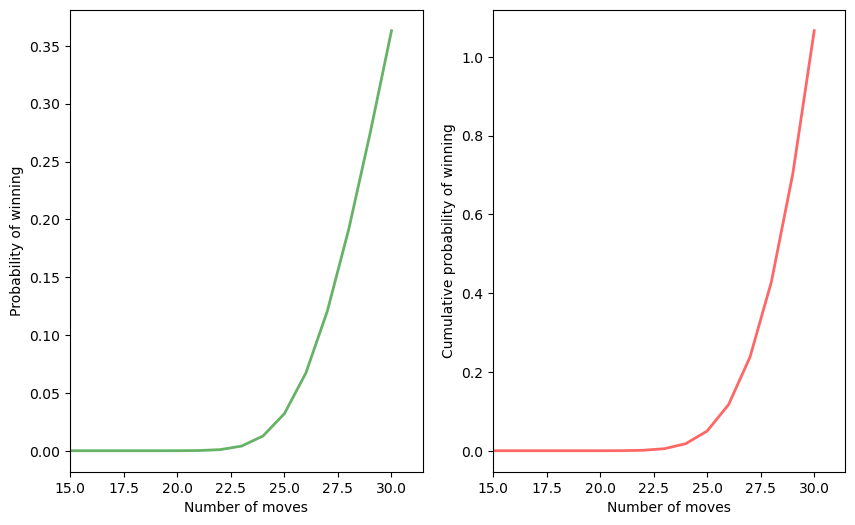

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

# Rule: you NEED to land on 100.
for i, v in enumerate(range(95,101)):
    T[v,v] += (i+1)/6

print(T[0:6,0:12])
print(T[94:100,94:101])

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n, P, C = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
    C.append(cumulative_prob)
    
mode = np.argmax(P)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,n,n), P, 'g', lw=2, alpha=0.6)
ax[0].set_xlim(15)
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,n,n), C, 'r', lw=2, alpha=0.6)
ax[1].set_xlim(15)
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')


plt.show()

### The snakes and ladders are added as a list of tuples indicating which squares are joined. Note that the square on which a snake or ladder originates doesn't really need to be included in the transition matrix (since the player can never occupy these positions), but here we keep them for simplicity.


[[0.         0.16666667 0.16666667 ... 0.         0.         0.        ]
 [0.         0.         0.16666667 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.16666667 0.16666667]
 [0.         0.         0.         ... 0.         0.         0.16666667]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.16666667 0.16666667 ... 0.         0.         0.        ]
 [0.         0.         0.16666667 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.66666667 0.         0.16666667]
 [0.         0.         0.         ... 0.         0.83333333 0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
modal number of moves: 21


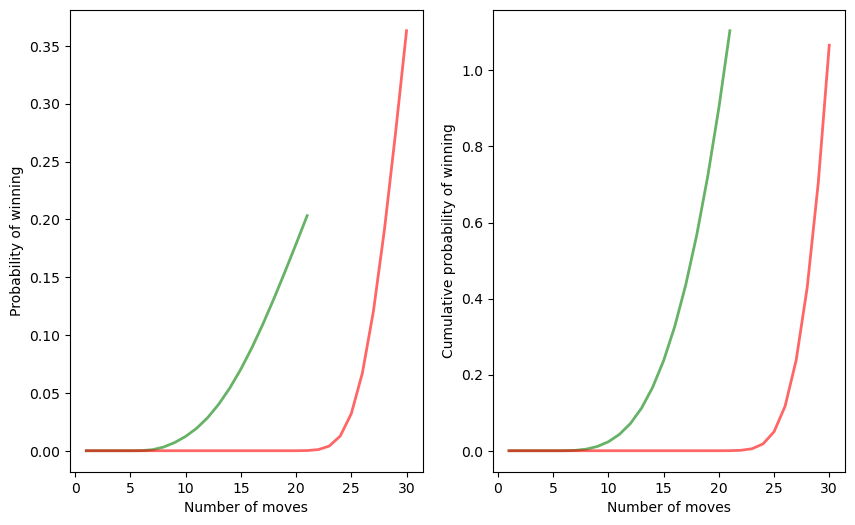

In [29]:
import numpy as np
import matplotlib.pyplot as plt

ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
           (53,74), (63,86), (76,91), (84,98)]
snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
          (47,26), (83,39), (92,75), (99,70)]
trans = ladders + snakes

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

print(T)

for (i1,i2) in trans:
    iw = np.where(T[:,i1] > 0)
    T[:,i1] = 0
    T[iw,i2] += 1/6

# Rule: you NEED to land on 100.
for i, v in enumerate(range(95,101)):
    T[v,v] += (i+1)/6


for snake in snakes:
    T[snake,100] = 0
    
print(T)

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

ns, Ps, Cs = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    ns += 1
    v = v.dot(T)
    Ps.append(v[100])
    cumulative_prob += Ps[-1]
    Cs.append(cumulative_prob)
    
mode = np.argmax(Ps)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,ns,ns), Ps, 'g-', lw=2, alpha=0.6, label='Markov')
ax[0].plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,ns,ns), Cs, 'g-', lw=2, alpha=0.6, label='Markov')
ax[1].plot(np.linspace(1,n,n), C, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')

plt.show()

b)	Write an actual simulation of a single-player snakes and ladders game, for the cases of “no snakes and ladders” and “with snakes and ladders”, and then compare to the Markov Chain predictions from part (a).  The idea here is that you just start on square zero, and roll a six-sided fair die, and move the appropriate number of squares, and keep rolling until you reach square 100 (exactly).  You will have to think carefully about how you handle the situation where you land on either a “ladder” or “snake” square.

In [ ]:
def no_snakes_and_ladders():
    num_moves = 0
    player_pos = 0
    
    while player_pos != 100:
        
        move = random.randint(1, 6)
        if player_pos + move <= 100:
            player_pos += move
        num_moves += 1
    
    return num_moves

In [ ]:
def with_snakes_and_ladders():
    
    ladders_and_snakes = {3:19, 15:37, 22:42, 25:64, 41:73,
           53:74, 63:86, 76:91, 84:98, 11:7, 18:13, 28:12, 36:34, 77:16,
          47:26, 83:39, 92:75, 99:70}
    
    num_moves = 0
    player_pos = 0
    
    while player_pos != 100:
        
        move = random.randint(1, 6)
        if player_pos + move <= 100:
            player_pos += move
            if player_pos in ladders_and_snakes:
                player_pos = ladders_and_snakes[player_pos]
        num_moves += 1

    return num_moves